<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/logo.png?raw=1" width="800">

Made by **Balázs Nagy** and **Márk Domokos**

[<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/open_button.png?raw=1">](https://colab.research.google.com/github/Fortuz/edu_Adaptive/blob/main/practices/L01%20-%20Linear%20Regression%20with%20One%20Variable_solved.ipynb)

# Lab 01: Linear regression with one variable
### Profit in a city
In this exercise, we will implement a univariate linear regression model to predict the profit of a food chain company.

Imagine you are the CEO of a food chain company and thinking about where to open a new store, in which cities it would be beneficial. The food chain company already has the conditions to do this, you just need to decide which cities to expand in. To do this the company has collected data on the population of the cities and the realized profits so far. The task is to use this data for prediction as well.

### 1: Import the packages
We will need some elements of matplotlib for drawing and NumPy for easier array handling.

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd

### 2: Load data

The data will be loaded from a publicly available file. An alternative solution would be to upload the data file directly to the google colab file system.

In [2]:
!wget https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab01/Lab1data.txt

--2024-12-10 20:53:37--  https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab01/Lab1data.txt
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Fortuz/edu_Adaptive/main/practices/assets/Lab01/Lab1data.txt [following]
--2024-12-10 20:53:37--  https://raw.githubusercontent.com/Fortuz/edu_Adaptive/main/practices/assets/Lab01/Lab1data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1359 (1.3K) [text/plain]
Saving to: ‘Lab1data.txt’

Lab1data.txt        100%[===================>]   1.33K  --.-KB/s    in 0s      

2024-12-10 20:53:37 (47.8 MB/s) - ‘Lab1data.txt’ saved [1359/1359]



Sort your data into the appropriate variables. First we define 2 lists, X and Y. Moving down the line, we split the data along the separator character. Then we transform the data into a NumPy array and format it into 2 column vectors. At the end of the operation, the dimension of both arrays will be m x 1, where m is the number of samples. X will contain the input variables and Y will contain the so called labels.

In [3]:
data = pd.read_csv('Lab1data.txt',header = None).to_numpy()
X = data[:,0:1]                                                # sort X
m = X.shape[0]                                                 # number of samples
Y = data[:,1].reshape(m,1)                                     # sort Y

print('X:',X.shape)                                            # check the shapes
print('Y:',Y.shape)
print('Number of samples: ',m)
#print(X)

X: (97, 1)
Y: (97, 1)
Number of samples:  97


### 3: Visualization

Plot the data on a graph to see the structure of the data!

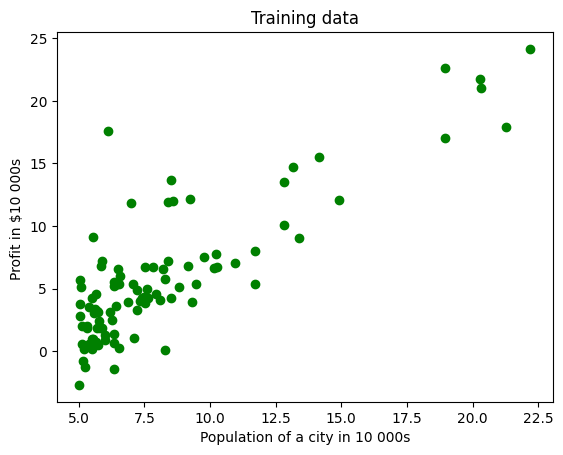

In [4]:
plt.plot(X,Y,'o', c= "g")
plt.title("Training data")
plt.xlabel("Population of a city in 10 000s")
plt.ylabel("Profit in $10 000s ")
plt.show()

So, for example, the graph shows that a city with a population of 150,000 can expect to make a profit of about $120,000. This is our labelled data, so each sample has its expected output. In our example, the population data will be the input and the expected profit will be the output.

### 4: Linear regression model

We will try to approximate the data on the graph with a line, which will be our starting hypothesis.
Our linear regression model can be written as follows:

$ h_{w}(x) = w_{0} + xw_{1}  = \hat{y}$

,where <br>
$h$ - hypothesis<br>
$x$ - input data - so called feature. (Only one in this model)<br>
$w$ - weights <br>
$\hat{y}$ - prediction (or estimated value)

The block diagram of the algorithm is illustrated in the figure below.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab01/Pics/L01_Model.png?raw=1" width="350">

The goal is to get the estimated profit output given the size of a city according to our hypothesis. To do this, we first need to set up our hypothesis. We specify the model, which in our case is a linear fit, and then we set the parameters using the available samples. It is called the training of the model.

To test the fit of the model we need to define a cost function. The cost function will determine how good our model is in a given iteration.

### 5. Cost function

The cost function (also called Error function) in this approach is the MSE (Mean Squared Error) function, which can be written as follows:

$C=\frac{1}{2m}\sum_{i=1}^{m}(\hat{y}^{i}-y^{i})^2$

This is the sum of the squared differences between our estimates and our labels for the samples. Thus, the error will always be a positive number, the smaller the better our estimate. The constant multiplier term corresponding to the sample number will play more of a role later on. The nature of the error term is not affected.

Inserting our hypothesis we obtain the following form:

$C=\frac{1}{2m}\sum_{i=1}^{m}(h_w(x^{i})-y^{i})^2$

And in its final complete form:

$ C(w_{0},w_{1})=\frac{1}{2m} \cdot \sum_{i=1}^{m}(w_{0} + x^iw_{1} − y^{i})^2 $

As we have defined our hypothesis in a way that we can adjust the offset of the line with the weight $w_0$ in addition to the slope of the line, it is useful to introduce a variable to facilitate matrix operations. Let $x_0=1$, so we have extended our single variable input with a BIAS member.

$ C(w_{0},w_{1})=\frac{1}{2m} \cdot \sum_{i=1}^{m}(w_{0}x^{i}_{0} + w_{1}x^{i}_{1} − y^{i})^2 $

With this extension, where the constans 1 member is also considered as an input variable, the matrix specification is facilitated.

In matrix form, we can write the cost function as follows:

$ C = \frac{1}{2m} \cdot \sum(XW-Y)^2 $

Let's review the matrices used in this example.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab01/Pics/L01_Matrixok.png?raw=1" width="350">

With the help of these matrices, our estimation per sample and the calculation of the cost function for all samples can be done easily.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab01/Pics/L01_CostCalculation.png?raw=1" width="550">

Create the necessary matrices! Initialize the weights with 0!

In [13]:
################### CODE HERE ########################
# Initialize the  W vector with the right size
# Extend X with the BIAS

# 初始化权重向量 W
W = np.zeros((2, 1))  # 因为扩展后 X 有两列

# 扩展 X，添加 BIAS 列
X = np.hstack((np.ones((X.shape[0], 1)), X))

######################################################

Check the dimension of your arrays before performing any matrix operations.

In [14]:
print('X dimensions:\n', X.shape)
print('Y dimensions:\n', Y.shape)
print('W dimensions:\n', W.shape)

X dimensions:
 (97, 2)
Y dimensions:
 (97, 1)
W dimensions:
 (2, 1)


### Cost function:
Define a function to compute the cost function that takes as input the matrices $X$, $Y$ and $W$ and returns the computed scalar cost.

In [15]:
def computeCost(X, Y, W):
    ################### CODE HERE ########################
    # 计算成本函数
    m = len(Y)
    predictions = X @ W  # 矩阵乘法
    errors = predictions - Y  # 预测误差
    C = (1 / (2 * m)) * (errors.T @ errors)  # 均方误差
    ######################################################
    return C.item()  # 返回标量值

In [16]:
C1=computeCost(X,Y,np.array([[0],[0]]).reshape((2,1)))
print('''Test (Cost function):
\tWeights: W = [0;0]
\tApproximate ground trueth value = 32.07
\tCalculated value = ''',C1)
C2=computeCost(X,Y,np.array([[-1],[2]]))
print('''\n\tWeights: W = [-1;2]
\tApproximate ground trueth value = 54.24
\tCalculated value = ''',C2)

if int(C1) == 32 and int(C2) ==54:
    print("\n The computeCost function works properly.")
else:
    print("\n Something went wrong!")

Test (Cost function):
	Weights: W = [0;0]
	Approximate ground trueth value = 32.07
	Calculated value =  32.072733877455676

	Weights: W = [-1;2]
	Approximate ground trueth value = 54.24
	Calculated value =  54.24245508201238

 The computeCost function works properly.


### 6. Gradient descent

After defining the cost function, the task is to minimize the cost function. We aim for an optimum. To find the minimum point we will use the gradient descent method.

The gradient descent method consists of calculating the gradient (derivative) of the function at a given point. The derivative in our case effectively defines the tangent line of the function at that point. Accordingly, we can determine where we need to move on the function to get closer to the minimum. At the minimum point, the derivative of the function is 0.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab01/Pics/L01_Gradient.png?raw=1" width="450">

We calculate the gradient (partial derivatives) of the cost function to modify the weights. The modifications are continued until the algorithm converges to the minimum point.

The weight update of the gradient method can be described by the following formula:

$w_j:=w_j-\mu\frac{\partial}{\partial w_j}C(w_0,w_1)$

,where <br>
$\mu$ - learning rate, parameter to set the speed of convergence. $0 < \mu < 1$.

When $\mu$ is chosen small, convergence slows down but approaches the minimum point more closely <br>
When $\mu$ is chosen high, it can cause divergence, which can lead to the algorithm crashing.

One thing to keep in mind when using this method is that the weights should be adjusted simultaneously and in synchrony.


### 7. Gradient descent applied to linear regression

Hypothesis and cost function of the linear regression model:

$ h_w(x)=w_0+w_1x $

$ \color{blue}{C(w_0,w_1)}=\frac{1}{2m}\sum_{i=1}^{m}(h_w(x^{i})-y^{i})^2 $

Weight update of the gradient descent method:

$w_j:=w_j-\mu\frac{\partial}{\partial w_j}\color{blue}{C(w_0,w_1)}$

Substituting the linear regression model into the gradient descent method for the partial derivative, we obtain the following:

$ \frac{\partial}{\partial w_j}C(w_0,w_1)=\frac{\partial}{\partial w_j}\frac{1}{2m}\sum_{i=1}^{m}(h_w(x^{i})-y^{i})^2
=\frac{\partial}{\partial w_j}\frac{1}{2m}\sum_{i=1}^{m}(w_0+w_1x^i-y^{i})^2 $

Performing the partial derivation according to the weights.

$ \color{red}{(j=0)}\hspace{7mm} \frac{\partial}{\partial w_j}C(w_0,w_1)=\frac{1}{m}\sum_{i=1}^{m}(w_0+w_1x^i-y^{i})\cdot 1=\frac{1}{m}\sum_{i=1}^{m}((h_w(x^{i})-y^{i})\cdot \color{red}{x_0^i}) $

$ \color{red}{(j=1)}\hspace{7mm} \frac{\partial}{\partial w_j}C(w_0,w_1)=\frac{1}{m}\sum_{i=1}^{m}(w_0+w_1x^i-y^{i})\cdot x_1^i=\frac{1}{m}\sum_{i=1}^{m}((h_w(x^{i})-y^{i})\cdot x_1^i) $

So accordingly, the weight updates in our example are given by:

$ w_0=w_0-\frac{\mu}{m}\sum_{i=1}^{m}((h_w(x^{i})-y^{i}) \cdot \color{red}{x_0^i}) $

$ w_1=w_1-\frac{\mu}{m}\sum_{i=1}^{m}((h_w(x^{i})-y^{i}) \cdot x^i_1) $

Since we introduced $ x_0 $ as a variable, the weight update formula generalizes well to different cases. Care should also be taken to update the weights simultaneously during the encoding, as asynchronous updating may cause a counting error!


We continue the process until we reach the optimum point or until we reach a desired number of iterations. So let's define a learning rate and an epoch number, which will limit the number of desired updates.

In [17]:
epochs = 1500
learning_rate =0.01

Define a function that implements the gradient method. Within the function, store the previous values of the cost function in the variable $C_{history}$ for later evaluation!

In [18]:
def gradientDescent(X, Y, W, learning_rate, epochs):
    m = len(Y)
    C_history = np.zeros((epochs, 1))  # 存储每次迭代的成本值

    ################### CODE HERE ########################
    for epoch in range(epochs):
        # 计算预测值和误差
        predictions = X @ W
        errors = predictions - Y

        # 计算梯度
        gradients = (1 / m) * (X.T @ errors)

        # 同步更新权重
        W = W - learning_rate * gradients

        # 记录成本函数值
        C_history[epoch] = computeCost(X, Y, W)
    ######################################################

    return W, C_history


Let's run the function using the gradient descent method.

In [19]:
print('''\n gradientDescent() function test (learning_rate=0.01):
\tWeights expected (approx.):
\t [-3.6303] [1.1664]''')
W,C_history=gradientDescent(X,Y,W,learning_rate,epochs)
print('\tWeights calculated:\n\t',W[0],W[1])

if (W[0]+3.6303) < 0.1 and (W[1]-1.1664) < 0.1:
    print("\n A gradientDescent function is good. You can proceed.")
else:
    print("\n Something went wrong!")


 gradientDescent() function test (learning_rate=0.01):
	Weights expected (approx.): 
	 [-3.6303] [1.1664]
	Weights calculated:
	 [-3.63029144] [1.16636235]

 A gradientDescent function is good. You can proceed.


### 8. Visualization of the results

#### Display of cost function during iterations:

Plot the values of the cost function over the iterations. This will show how our algorithm actually converges during the epoch.

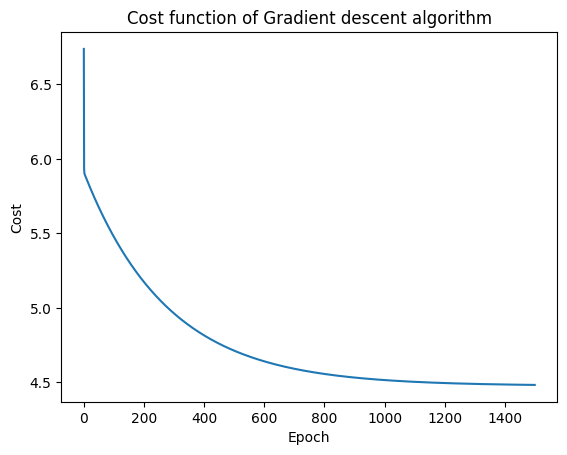

In [20]:
plt.plot(C_history)
plt.title("Cost function of Gradient descent algorithm")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()

### Display the fitted line on the input data

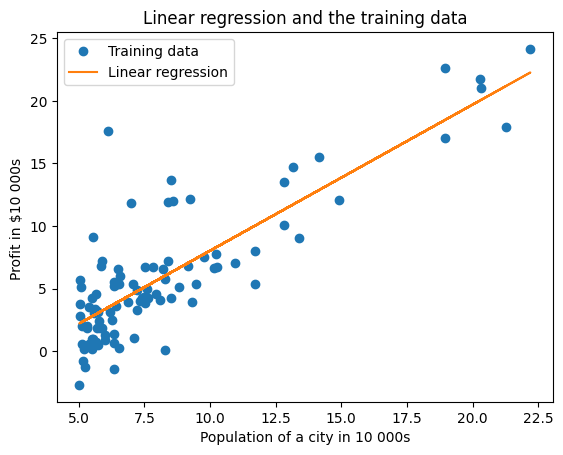

In [21]:
plt.plot((X[:,1]).reshape(97,1),Y,'o', label = "Training data")
plt.plot((X[:,1]).reshape(97,1),X@W,'-',label = "Linear regression")
plt.xlabel("Population of a city in 10 000s")
plt.ylabel("Profit in $10 000s ")
plt.title("Linear regression and the training data")
plt.legend()
plt.show()

### 9. Prediction with the trained model
To use the model, estimate the expected profit in a city of 10000 and 17000 inhabitants.

In [22]:
Prediction1 = (np.array([1, 10]))@W
Prediction2 = (np.array([1, 17]))@W
print('\nPrediction for 10 000 citizens:')
print(Prediction1 * 10000)
print('\nPrediction for 17 000 citizens:')
print(Prediction2 * 10000)


Prediction for 10 000 citizens:
[80333.32063951]

Prediction for 17 000 citizens:
[161978.68516301]


### Display cost function (surface plot)
For a better illustration, it is worth examining the cost function over a larger interval. To do this, create a vector for each of the two weights and calculate the cost for each pair of values. This will give us an idea of the surface on which the optimum point was sought and where it was found.

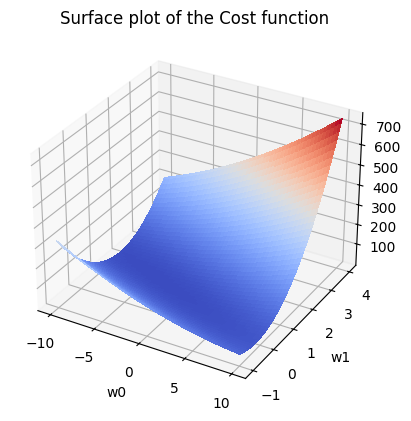

In [23]:
w0_vals = np.linspace(-10,10,100)
w1_vals = np.linspace(-1,4,100)
C_vals = np.zeros((w0_vals.size,w1_vals.size))

for i in range((w0_vals).size):
    for j in range((w1_vals).size):
        t=np.array([w0_vals[i],w1_vals[j]]).reshape(2,1)
        C_vals[[i],[j]]= computeCost(X,Y,t)
C_vals=C_vals.T

fig= plt.figure()
ax=plt.axes(projection='3d')
x, y = np.meshgrid(w0_vals, w1_vals)
surf = ax.plot_surface(x, y, C_vals, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.title("Surface plot of the Cost function")
plt.xlabel("w0")
plt.ylabel("w1")
plt.show()

### Display cost function (contour plot)
The contour plot is also a useful visualisation option, which has the advantage of flattening our 3D surface into 2D for easier transparency.

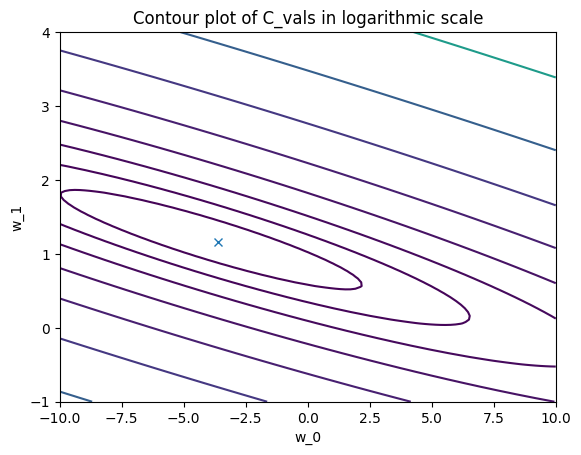

In [24]:
plt.contour(w0_vals,w1_vals,C_vals,np.logspace(-2,3,20))
plt.plot(W[0],W[1],'x')
plt.title("Contour plot of C_vals in logarithmic scale")
plt.xlabel("w_0")
plt.ylabel("w_1")
plt.show()

## Once again. Using higher level packages
Python and its advanced packages allow you to write much more compact code, making it easier to prototype quickly. Let's see how the example we looked at in the exercise can be more concisely solved.

Prediction for a city with a population of 10 000: 80345.56 $
Prediction for a city with a population of 17 000: 163857.91 $


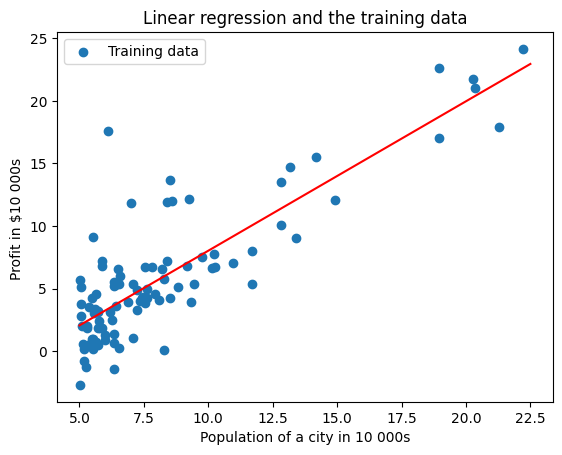

In [25]:
import pandas as pd                                  # Pandas for data handling
from sklearn.linear_model import LinearRegression    # sklearn implementation
import matplotlib.pyplot as plt

data = pd.read_csv('Lab1data.txt', header = None)
XX = data.iloc[:, 0].values.reshape(-1, 1)           # Separate data
YY = data.iloc[:, 1].values.reshape(-1, 1)           # Separate data


lin_reg = LinearRegression()                         # Set linear regression class
lin_reg.fit(XX,YY)                                   # Fit linear regression
pred1 = lin_reg.predict([[10]])                      # Prediction for 10000
pred2 = lin_reg.predict([[17]])                      # Prediction for 17000

print('Prediction for a city with a population of 10 000: %.2f $' % (pred1*10000)[0,0])
print('Prediction for a city with a population of 17 000: %.2f $' % (pred2*10000)[0,0])

regline = lin_reg.predict([[5],[22.5]])              # Linear regression equatation

plt.scatter(XX,YY, label = "Training data")          # Plot
plt.plot([[5],[22.5]],regline,'r')
plt.xlabel("Population of a city in 10 000s")
plt.ylabel("Profit in $10 000s ")
plt.title("Linear regression and the training data")
plt.legend()
plt.show()

<div style="text-align: right">This lab exercise uses elements from Andrew Ng's Machine Learning course.</div>